In [4]:
import gymnasium as gym
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from IPython.display import Image

## random policy

- Equal probability for selecting any action in any state

In [5]:
def random_policy(nS,nA):
    action_prob = [1/nA] * nA
    return [action_prob for _ in range(nS)]

## greedy policy

- Always select the action with the highest Q-value (predicted future reward) for the current state to exploit 

In [6]:
def greedy_policy(Q, nS, nA):
    # initialize arbitrary policy
    policy = np.zeros([nS,nA])
    
    # list of states in environment 
    S = [i for i in range(nS)]

    # loop over states
    for state in S:
        if all([ q == 0 for q in Q[state]]) :
            policy[state] = random_policy(1,nA)[0]
        
        else:
            best_action = np.argmax(Q[state]) 
            policy[state] = np.eye(nA)[best_action].tolist()

    return policy

## ε-greedy policy

- Initialize the exploration rate ε
- Generate a random number between 0 and 1.
- If the generated random number is less than ε, select a random action to explore.
- Otherwise, select the action with the highest Q-value for the current state to exploit.

In [12]:
def epsilon_greedy_policy(Q, nS, nA, epsilon):
    # initialize arbitraty policy
    policy = [[0 for _ in range(nA)] for _ in range (nS)]
    
    # list of states in environment 
    S = [i for i in range(nS)]

    # list of possible actions to be taken by the agent
    A = [i for i in range(nA)]

    # loop over states
    for state in S:

        # if all Q values in state are 0, agent picks random action
        if all([ q == 0 for q in Q[state][:]]):
            for action in range(nA):
                policy[state][action] = 1/nA

        else:
            # position of maximum Q value in state
            maxQ = np.argmax(Q[state])

            # probability agent acts randomly
            prob = [epsilon/nA for _ in range(nA)]

            # probability agent acts greedily
            prob[maxQ] = 1 - epsilon  + (epsilon/nA)

            for action in A:
                policy[state][action] = prob[action]
    return policy

Function to evaluate policy performance
----------------------------------------

- Evaluate average episode reward following a given policy 

In [14]:
def evaluate_average_reward(env, nA, policy, num_eval_episodes = 100):
    # store episode rewards 
    episode_rewards = []

    # list of possible actions to be taken by the agent
    A = [i for i in range(nA)]
    
    # loop over number of episodes 
    for _ in range(num_eval_episodes):
        state = env.reset()[0]
        episode_reward = 0

        # loop until episode ends
        while True:
            # pick action according to the current policy
            action = random.choices(A, weights=[policy[state][i] for i in range(nA)], k=1)[0]

            # take action
            next_state, reward, terminated, truncated, info = env.step(action)

            # update current state
            state = next_state

            # count cumulative episode reward:
            episode_reward += reward
        
            # exit loop when episode is terminated or truncated
            if terminated==True or truncated == True:
                episode_rewards.append(episode_reward)
                break
    
    env.reset()
    
    reward_average = np.mean(episode_rewards)

    return reward_average

Frozen Lake environment from gymnasium API
--------------------------------------------

In [10]:
env = gym.make('FrozenLake-v1',map_name="4x4",render_mode="ansi",is_slippery=False)

# restart episode with agent in state 0
next_state, info = env.reset()

print(env.render())

nS = env.observation_space.n
nA = env.action_space.n

print(f"Size of state space: {nS} \nSize of action space: {nA}")



SFFF
FHFH
FFFH
HFFG

Size of state space: 16 
Size of action space: 4


SARSA
------
------

State-action-reward-state-action (SARSA) is an on-policy algorithm designed to learn a new Markov decision process policy in order to solve reinforcement learning challenges. It’s an algorithm where, in the current state, S, an action, A, is taken and the agent gets a reward, R, and ends up in the next state, S1, and takes action, A1, in S1. Therefore, the tuple (S, A, R, S1, A1) stands for the acronym SARSA. 

SARSA (on-policy TD control) algorithm:


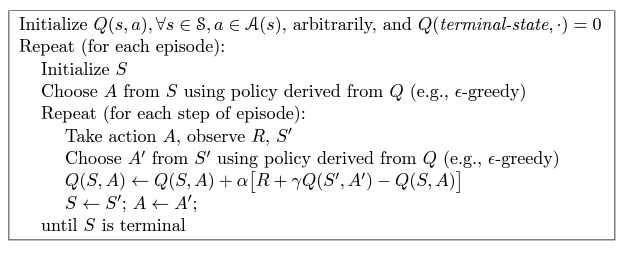

In [1]:
print("SARSA (on-policy TD control) algorithm:")
Image(filename='Pseudo-code/on-policy_TD_control.png')

Set hyperparameters

In [ ]:
# Learning rate [0,1]
alpha = # ...
# Discount factor [0,1]
gamma = # ...
# Exploration rate [0,1]
epsilon = # ...
# Number of episodes [1,infty]
num_episodes = # ...

In [16]:
def SARSA(env, nS, nA, num_episodes, alpha, gamma, epsilon):

    # initialize arbitrary action-value function
    Q = # ...

    # list of possible actions to be taken by the agent
    A = [i for i in range(nA)]

    # intialise epsilon-greedy policy
    policy = # ...

    # evaluate initial average episode reward
    average_reward = evaluate_average_reward(env, nA, policy, num_eval_episodes = 100)
    
    # store number of policy iterations and average episode reward during training
    num_policy_iter = [0]
    average_rewards_list = [average_reward]
    
    # number of policy iterations
    n = 0
    
    # loop over number of episodes of experience sampled by agent 
    for _ in range(num_episodes):
        n+= 1

        # initialize starting state of episode
        state = 0 
        
        # Choose a random action to start
        action = env.action_space.sample() 

        # loop until episode terminates or truncates 
        while True:
            # take chosen action and observe next state and reward
            next_state, reward, terminated, truncated, info = env.step(action)

            #  use the epsilon-greedy algorithm in order to select an action
            next_action = # ...
            
            #update action-value function
            Q[state][action] = # ...

            if terminated == False and truncated == False:
                # update current state
                state = next_state

                # update current action 
                action = next_action

                # update current policy
                policy = # ...
            
            # if epsiode terminates or truncates, reset episode and exit loop
            if terminated == True or truncated == True:
                # save number of policy iterations
                num_policy_iter.append(n)
                # evaluate average episode reward
                average_reward = evaluate_average_reward(env, nA, policy, num_eval_episodes = 100)
                average_rewards_list.append(average_reward)
                
                # reset environment
                # exit loop   

    return Q, policy, num_policy_iter, average_rewards_list

SyntaxError: invalid syntax (1964014651.py, line 4)

In [ ]:
Q, policy, num_policy_iter, average_rewards_list = SARSA(env, nS, nA, num_episodes, alpha, gamma, epsilon)

Evaluate the results
--------------------

In [ ]:
# plot learning rate
fig, ax = plt.subplots()
ax.plot(num_policy_iter, average_rewards_list, color = 'black', label = "")

ax.set_xlabel("Number of policy iterations")
ax.set_ylabel('Average reward')

ax.legend(prop = { "size": 10 })

plt.xticks(np.arange(num_policy_iter[0], num_policy_iter[-1]+1,  num_policy_iter[-1]*0.1))

plt.show()